<a href="https://colab.research.google.com/github/Petek1010/ML_exercises/blob/main/ClassifyingNewswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Newswires (Multiclass Classification)

Task: Build a model to classify Reuters newswires into 46 mutually exlusive topics. Because we have many classes, this problem is an instance of multi-
class classification, and because each data point should be classified into only one cate-
gory, the problem is more specifically an instance of single-label multiclass classification.

Size of training examples:  8982
Size of test examples:  2246
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.3143 - loss: 3.2734 - val_accuracy: 0.5970 - val_loss: 1.9253
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.6402 - loss: 1.7609 - val_accuracy: 0.6760 - val_loss: 1.4157
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7378 - loss: 1.2515 - val_accuracy: 0.7350 - val_loss: 1.1991
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7847 - loss: 1.0208 - val_accuracy: 0.7560 - val_loss: 1.0945
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8149 - loss: 0.8613 - val_accuracy: 0.7900 - val_loss: 1.0175
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8490 - loss: 0.7059 - val_accuracy: 0.7930 - val_loss: 0.9549
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8710 - loss: 0.5918 - val_accuracy: 0.8090 - val_loss: 0.9248
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/st

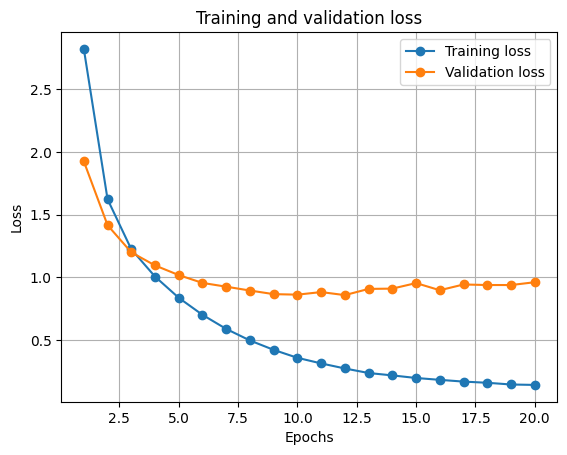

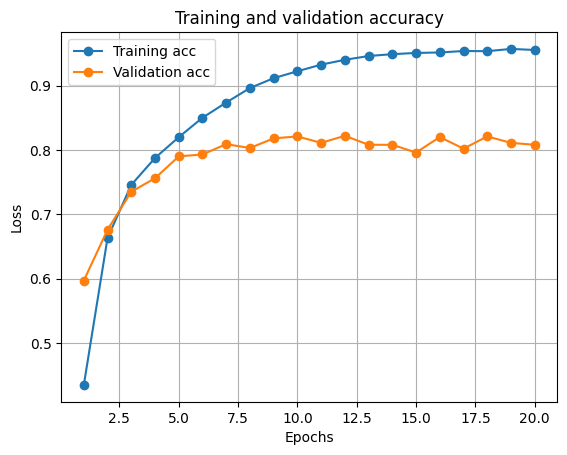

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters
import keras
from keras import layers

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print('Size of training examples: ',len(train_data))
print('Size of test examples: ',len(test_data))


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
         results[i, j] = 1.
    return results

# Vectorizing the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Vectorizing labels
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

'''
There is a build-in way to do this in Keras:

from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

'''

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Data for Validating:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

# Plotting accuracy curves

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)


plt.plot(epochs, loss_values, 'o-', label='Training loss')
plt.plot(epochs, val_loss_values, 'o-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, acc_values, 'o-', label='Training acc')
plt.plot(epochs, val_acc_values, 'o-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Further Experimenting

In [6]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Data for Validating:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, y_test)
print('Test loss: ',results[0])
print('Test accuracy: ',results[1]*100)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.3204 - loss: 3.2208 - val_accuracy: 0.6200 - val_loss: 1.8523
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6708 - loss: 1.6365 - val_accuracy: 0.6900 - val_loss: 1.3686
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7443 - loss: 1.1968 - val_accuracy: 0.7390 - val_loss: 1.1802
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8001 - loss: 0.9515 - val_accuracy: 0.7760 - val_loss: 1.0892
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8306 - loss: 0.7986 - val_accuracy: 0.7810 - val_loss: 0.9948
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8533 - loss: 0.6753 - val_accuracy: 0.7990 - val_loss: 0.9248
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8811 - loss: 0.5595 - val_accuracy: 0.8090 - val_loss: 0.8961
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9032 - loss: 0.4598 - val_accuracy: 0.8150 - val_loss

In [8]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print('The class with the highest probability: ',np.argmax(predictions[0]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(46,)
1.0
The class with the highest probability:  3
